#**Project Name: Fake News Detection**

**Section:** 10

**Group:** 04

**Dataset:** https://www.kaggle.com/datasets/jruvika/fake-news-detection?fbclid=IwAR0EVeWhSKNM62VU7Tq6UXnEQsSqIhbKDq8gSoQGdzbx4Xb_wG3sMcmqYlw

**Group Members:**

Meherin Majid Piper (ID: 21101146)

Kohinoor Sultana Elora (ID: 21101147)

Saowmi Mehjabin (ID: 21101153)

Sharon Rose Sarker (ID: 21101161)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


**Data Pre-processing**

In [ ]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [ ]:
print(f'Shape: {df.shape}')

Shape: (4009, 4)


Number of Data Points: 4009

Number of Features: 4

In [ ]:
df = df.drop(columns='Headline', axis=1)

In [ ]:
#checking the null values
df.isnull().sum()

URLs      0
Body     21
Label     0
dtype: int64

In [ ]:
#removing the null values

df = df.dropna()

In [ ]:
df.shape

(3988, 3)

In [ ]:
df.head()

,URLs,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,"Country singer Jason Aldean, who was performin...",1


In [ ]:
df.Body.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4003    False
4004    False
4005    False
4007    False
4008    False
Name: Body, Length: 3988, dtype: bool

In [ ]:
#removing duplicates

df.drop_duplicates(inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

,URLs,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,"Country singer Jason Aldean, who was performin...",1
...,...,...,...
3979,http://beforeitsnews.com/u-s-politics/2017/10/...,"Vietnam Is in Great Danger, You Must Publish a...",0
3980,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch\n% of readers think this story...,0
3981,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
3982,https://www.reuters.com/article/us-china-pharm...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [ ]:
#rechecking for null values

df.isnull().sum()

URLs     0
Body     0
Label    0
dtype: int64

In [ ]:
df.shape

(3984, 3)

In [ ]:
realNumber = (df["Label"]==1).sum()
fakeNumber = (df["Label"]==0).sum()

print(f'Total Number of Real news: {realNumber}')
print(f'Total Number of Fake news: {fakeNumber}')

Total Number of Real news: 1868
Total Number of Fake news: 2116


In [ ]:
import seaborn as sns

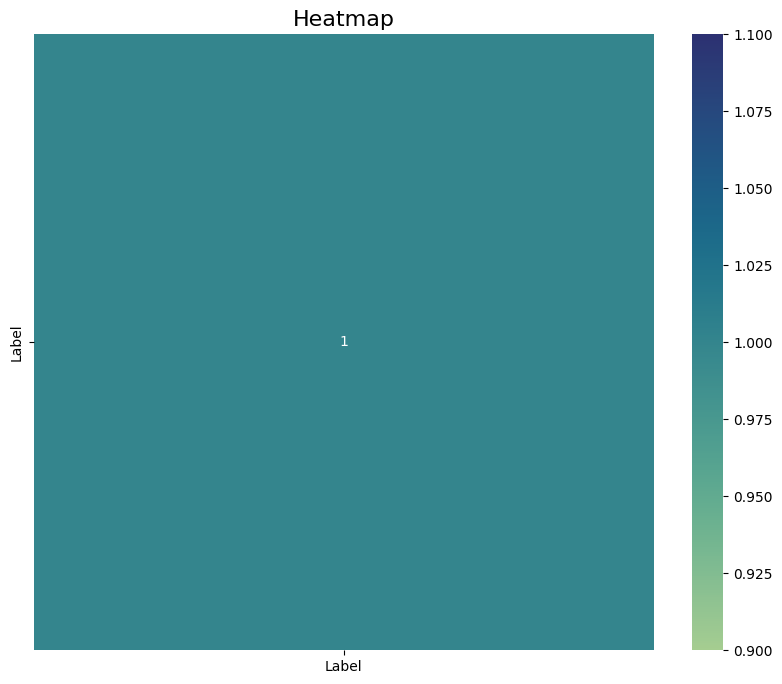

In [ ]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest")
plt.title("Heatmap", fontsize=16)
plt.show()

**Data Visualizations:**

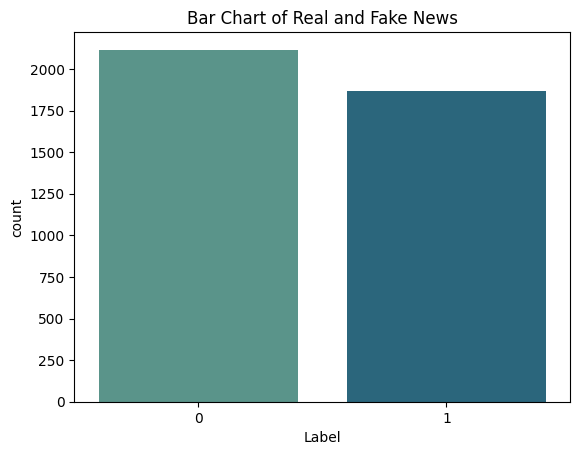

In [ ]:
#Barchart

labels = ["Fake news", "Real news"]
sns.countplot(x='Label', data=df, palette="crest")
plt.title('Bar Chart of Real and Fake News')
plt.show()

Here,

Real News = 1

Fake News = 0

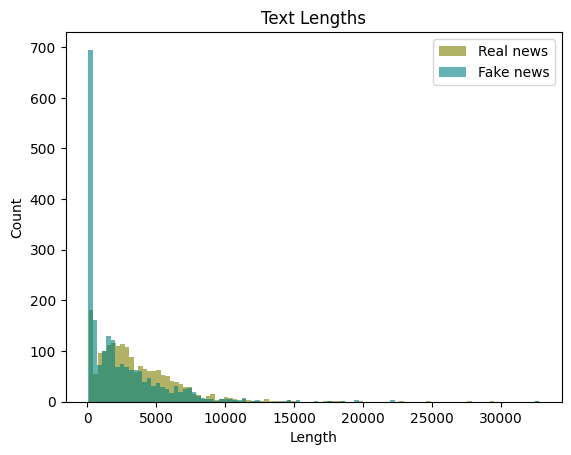

In [ ]:
#Histogram

real_df = df.loc[df['Label']==1]
fake_df = df.loc[df['Label']==0]

real_lengths = real_df['Body'].apply(len)
fake_lengths = fake_df['Body'].apply(len)

plt.hist(real_lengths, bins=100, alpha=0.6, label='Real news', color="olive")
plt.hist(fake_lengths, bins=100, alpha=0.6, label='Fake news', color="teal")
plt.title('Text Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

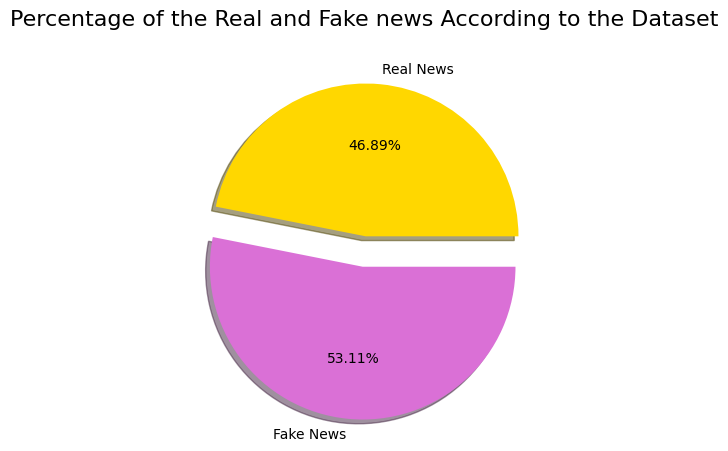

In [ ]:
y = np.array([realNumber, fakeNumber])
mylabels = ["Real News", "Fake News"]
myexplode = [0.2, 0]
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.2f%%', shadow = True, colors=['gold', 'orchid', ])
plt.title(label="Percentage of the Real and Fake news According to the Dataset", fontdict={"fontsize":16},pad=30)
plt.axis('equal')
plt.show()

**Data Visualization of Most Frequently Used Words**

In [ ]:
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["a", "told", "last", "an", "the","states", "t","first", "us", "new", "even","and", "said", "s", "—", "but", "or", "one","because", "trump’s","as", "until", "while", "of", "at", "by", "for", "with","white", "many", "former", "about", "against", "between", "into", "through", "during", "before","said.", "mr.", "”", "people", "-", "two", "after", "above", "(reuters)", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "can", "will", "just"])

In [ ]:
fake_df = df.loc[df['Label']==0]
Body = ' '.join(text for text in fake_df['Body'])
fake_text = Body.lower()
ft = [word for word in fake_text.split() if word not in stopwords]
countedWords = collections.Counter(ft)
fakedata=[]
fakewords = []
FakewordAndCount = {}
for letter, count in countedWords.most_common(9):
    FakewordAndCount[letter] = count

for i,j in FakewordAndCount.items():
        fakedata.append([i,j])
        fakewords.append(i)


In [ ]:
real_df = df.loc[df['Label']==1]
Body = ' '.join(text for text in real_df['Body'])
rtext = Body.lower()

fdword = set(fakewords)
realdata=[]
rt = [word for word in rtext.split() if word in fdword]
countedWords = collections.Counter(rt)

RealwordAndCount = {}
for letter, count in countedWords.most_common(9):
    RealwordAndCount[letter] = count
for i,j in RealwordAndCount.items():
        realdata.append([i,j])

In [ ]:
rdc = pd.DataFrame(realdata, columns=['Word', 'realCount'])
rdc

,Word,realCount
0,now,837
1,game,552
2,it’s,433
3,week,381
4,–,144
5,content,110
6,source:,49
7,(before,1


In [ ]:
fdc = pd.DataFrame(fakedata, columns=['Word', 'fakeCount'])
fdc

,Word,fakeCount
0,–,4024
1,game,1279
2,week,1072
3,(before,1056
4,news),1054
5,now,1043
6,it’s,1016
7,source:,992
8,content,950


In [ ]:
df3 = pd.concat([fdc, rdc])

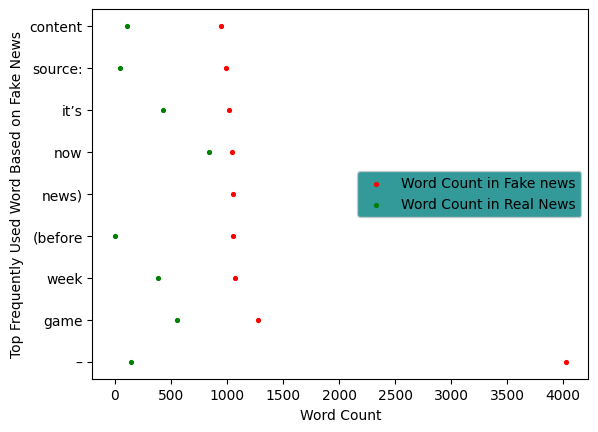

In [ ]:
plt.xlabel("Word Count")
plt.ylabel("Top Frequently Used Word Based on Fake News")
plt.scatter(df3["fakeCount"],df3["Word"],c="red", s=7.5)
plt.scatter(df3["realCount"],df3["Word"],c="green", s=7.5)
plt.legend(["Word Count in Fake news", "Word Count in Real News"], facecolor='teal', loc='right')
plt.show()

**Data Visualizations of Punctuation Used in Articles**

In [ ]:
real_df['Punctuation_Count'] = real_df['Body'].str.count(r'[^\w\s]')
fake_df['Punctuation_Count'] = fake_df['Body'].str.count(r'[^\w\s]')

Rlist = real_df['Punctuation_Count'].tolist()
Flist = fake_df['Punctuation_Count'].tolist()

<ipython-input-35-56b064648d1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_df['Punctuation_Count'] = real_df['Body'].str.count(r'[^\w\s]')
<ipython-input-35-56b064648d1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['Punctuation_Count'] = fake_df['Body'].str.count(r'[^\w\s]')


In [ ]:
rpc = pd.DataFrame(Rlist, columns=['realPCount'])
rpc = rpc.reset_index()
rpc.columns = ['SL. No.', 'realPCount']

fpc = pd.DataFrame(Flist, columns=['fakePCount'])
fpc = fpc.reset_index()
fpc.columns = ['SL. No.', 'fakePCount']

combo = pd.concat([fpc, rpc])


print(combo)

      SL. No.  fakePCount  realPCount
0           0        40.0         NaN
1           1       143.0         NaN
2           2        50.0         NaN
3           3       140.0         NaN
4           4         4.0         NaN
...       ...         ...         ...
1863     1863         NaN       227.0
1864     1864         NaN        73.0
1865     1865         NaN       147.0
1866     1866         NaN         4.0
1867     1867         NaN        50.0

[3984 rows x 3 columns]


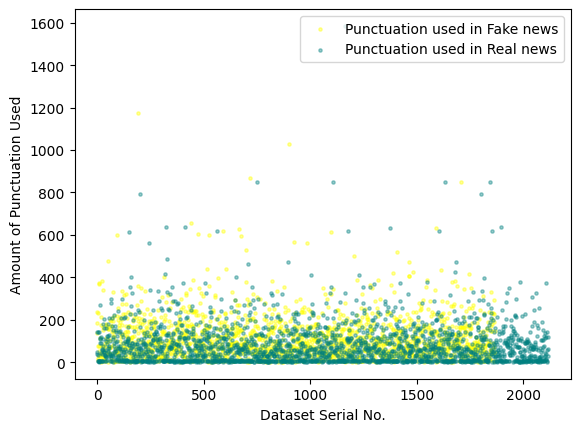

In [ ]:
#Scatter Plot

plt.scatter(combo["SL. No."], combo["realPCount"], c="yellow", s=5.5, alpha=0.4)


plt.scatter(combo["SL. No."], combo["fakePCount"], c="teal", s=5.5, alpha=0.4)

plt.xlabel("Dataset Serial No.")
plt.ylabel("Amount of Punctuation Used")
plt.legend(["Punctuation used in Fake news", "Punctuation used in Real news"], facecolor='white', loc='upper right')
plt.show()


In [ ]:
text_df = df.drop(columns='Label', axis=1)
label_df = df['Label']

print(text_df)
print(label_df)

                                                   URLs  \
0     http://www.bbc.com/news/world-us-canada-414191...   
1     https://www.reuters.com/article/us-filmfestiva...   
2     https://www.nytimes.com/2017/10/09/us/politics...   
3     https://www.reuters.com/article/us-mexico-oil-...   
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...   
...                                                 ...   
3979  http://beforeitsnews.com/u-s-politics/2017/10/...   
3980  http://beforeitsnews.com/sports/2017/09/trends...   
3981  http://beforeitsnews.com/u-s-politics/2017/10/...   
3982  https://www.reuters.com/article/us-china-pharm...   
3983  http://beforeitsnews.com/u-s-politics/2017/10/...   

                                                   Body  
0     Image copyright Getty Images\nOn Sunday mornin...  
1     LONDON (Reuters) - “Last Flag Flying”, a comed...  
2     The feud broke into public view last week when...  
3     MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...  
4

**Text Normalization:**

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
Pstemmer = PorterStemmer()
Stopword = nltk.corpus.stopwords.words('english')

In [ ]:
def eliminateUrl(alteredText):
    return re.sub(r'http\S+', ' ', alteredText)

def eliminatePunctuation(alteredText):
  return re.sub(r'[^\w\s]', '', alteredText)

def eliminateDigit(alteredText):
  return re.sub('[^a-z]',' ', alteredText)

def tokenize(alteredText):
  tokenizer = RegexpTokenizer('[a-z]\w+')
  return tokenizer.tokenize(alteredText)

def stem(alteredText):
  alteredText = [Pstemmer.stem(i) for i in alteredText if i not in Stopword]
  alteredText = ' '.join(alteredText)
  return alteredText


def wordPreprocessing(Text):
    alteredText = Text.lower()
    alteredText = eliminateUrl(alteredText)
    alteredText = eliminatePunctuation(alteredText)
    alteredText = eliminateDigit(alteredText)
    alteredText = tokenize(alteredText)
    alteredText = stem(alteredText)
    return alteredText

In [ ]:
df['Body'] = df['Body'].apply(wordPreprocessing)

In [ ]:
print(df['Body'])

0       imag copyright getti imag sunday morn donald t...
1       london reuter last flag fli comedydrama vietna...
2       feud broke public view last week mr corker sai...
3       mexico citi reuter egypt cheiron hold limit ri...
4       countri singer jason aldean perform la vega sh...
                              ...                        
3979    vietnam great danger must publish tell armi go...
3980    trend watch reader think stori fact add two ce...
3981    trump jr soon give minut speech reader think s...
3982    shanghai reuter china said plan accept data ov...
3983    vice presid mike penc leav nfl game antiameric...
Name: Body, Length: 3984, dtype: object


In [ ]:
textList = df['Body'].values
labelList = df['Label'].values

In [ ]:
print(textList)
print(labelList)

['imag copyright getti imag sunday morn donald trump went twitter tirad member parti isnt exactli huge news far first time presid turn rhetor cannon rank time howev attack particularli bite person essenti call tennesse senat bob corker chair power senat foreign relat committe coward run reelect said mr corker beg presid endors refus give wrongli claim mr corker support iranian nuclear agreement polit accomplish unlik colleagu mr corker free worri immedi polit futur didnt hold tongu skip twitter post senbobcork shame white hous becom adult day care center someon obvious miss shift morn senat bob corker senbobcork octob report wasnt end though spoke new york time realli let presid four choic quot tennesse senat interview time particularli damn dont know presid tweet thing true know everyon know cant realli sugarcoat one mr corker flatout say presid liar everyon know senat particular challeng mr trump insist unsuccess plead endors accus much broader mr corker presid use someth akin alli t

**TF-IDF features**

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
vectorizer.fit(textList)
textList = vectorizer.transform(textList)

In [ ]:
print(textList)

  (0, 35076)	0.015794910581703583
  (0, 34981)	0.010728916626326223
  (0, 34775)	0.041165829629272725
  (0, 34701)	0.02326569276475334
  (0, 34660)	0.026335059062409016
  (0, 34508)	0.03059080493718318
  (0, 34334)	0.09352781491189058
  (0, 34279)	0.021967027287821256
  (0, 34230)	0.022091952897424678
  (0, 34212)	0.017960723651277606
  (0, 34021)	0.013793173265045417
  (0, 33976)	0.020767756040342596
  (0, 33913)	0.01918582766687446
  (0, 33755)	0.021893363394133412
  (0, 33520)	0.039891931534144005
  (0, 33459)	0.024665065637159554
  (0, 33408)	0.03513695950437514
  (0, 33340)	0.029663005081483784
  (0, 33159)	0.0242604147031827
  (0, 33131)	0.02192997020080561
  (0, 33049)	0.019879151132988018
  (0, 32981)	0.036536332376781354
  (0, 32935)	0.036862642476636134
  (0, 32926)	0.03839412738624658
  (0, 32898)	0.03757718290789832
  :	:
  (3983, 7550)	0.024966720286875948
  (3983, 7453)	0.02991540625249588
  (3983, 7229)	0.0465335810108967
  (3983, 7100)	0.02220502264840252
  (3983, 6682)

**Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(textList ,labelList, test_size=0.2, random_state=100)

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(len(classes)), classes)
    plt.yticks(range(len(classes)), classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)
        print("Normalized confusion matrix")

    for i, j in [(i, j) for i in range(len(classes)) for j in range(len(classes))]:
        plt.text(j, i, f"{cm[i, j]:.2f}", ha="center", va="center", color="white" if cm[i, j] > 0.5 else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


**Model Training 01: Logistic Regression**

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
X_train_prediction_lr = LR.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, y_train)
print('Accuracy score of the training data : ', training_data_accuracy_lr)

Accuracy score of the training data :  0.9905867587072482


In [ ]:
X_test_prediction_lr = LR.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, y_test)
print('Accuracy score of the test data : ', test_data_accuracy_lr)

Accuracy score of the test data :  0.9774153074027604


In [ ]:
print("Accuracy in Logistic Regression Model: ", metrics.accuracy_score(y_test, X_test_prediction_lr))
print("Precision:",metrics.precision_score(y_test, X_test_prediction_lr, average='micro'))
print("Recall:",metrics.recall_score(y_test, X_test_prediction_lr, average='micro'))
print("F1 Score:",metrics.f1_score(y_test, X_test_prediction_lr, average='micro'))

Accuracy in Logistic Regression Model:  0.9774153074027604
Precision: 0.9774153074027604
Recall: 0.9774153074027604
F1 Score: 0.9774153074027604


Accuracy in Logistic Regression Model: 0.9774153074027604
Precision: 0.9774153074027604
Recall: 0.9774153074027604
F1 Score: 0.9774153074027604


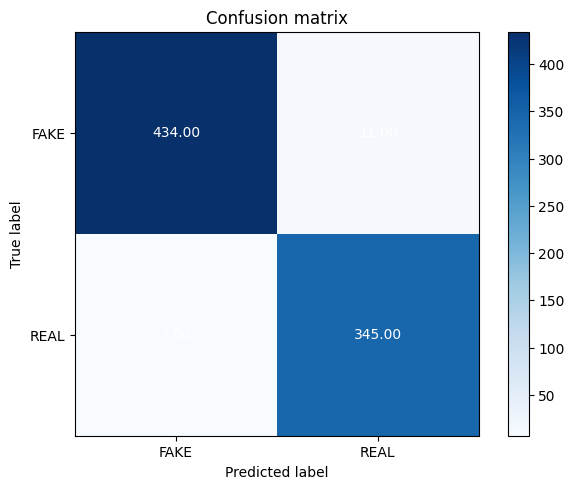

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt



classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
pred_lr = classifier_lr.predict(X_test)


accuracy_lr = accuracy_score(y_test, pred_lr)
precision_lr = precision_score(y_test, pred_lr, average='micro')
recall_lr = recall_score(y_test, pred_lr, average='micro')
f1_lr = f1_score(y_test, pred_lr, average='micro')
cm_lr = confusion_matrix(y_test, pred_lr)


print("Accuracy in Logistic Regression Model:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


plt.figure()
plot_confusion_matrix(cm_lr, classes=['FAKE', 'REAL'], cmap=plt.cm.Blues)

plt.show()


**Model Training 02: Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
X_train_prediction_nb = nb_classifier.predict(X_train)
training_data_accuracy_nb = accuracy_score(X_train_prediction_nb, y_train)
print('Accuracy score of the training data : ', training_data_accuracy_nb)

Accuracy score of the training data :  0.952933793536241


In [ ]:
X_test_prediction_nb = nb_classifier.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction_nb, y_test)
print('Accuracy score of the test data : ', test_data_accuracy_nb)

Accuracy score of the test data :  0.9272271016311167


In [ ]:
print("Accuracy in Naive Bayes Model: ", metrics.accuracy_score(y_test, X_test_prediction_nb))
print("Precision:",metrics.precision_score(y_test, X_test_prediction_nb, average='micro'))
print("Recall:",metrics.recall_score(y_test, X_test_prediction_nb, average='micro'))
print("F1 Score:",metrics.f1_score(y_test, X_test_prediction_nb, average='micro'))
print(confusion_matrix(y_test, X_test_prediction_nb))

Accuracy in Naive Bayes Model:  0.9272271016311167
Precision: 0.9272271016311167
Recall: 0.9272271016311167
F1 Score: 0.9272271016311167
[[402  43]
 [ 15 337]]


Accuracy: 0.9272271016311167
Precision: 0.9774153074027604
Recall: 0.9774153074027604
F1 Score: 0.9774153074027604


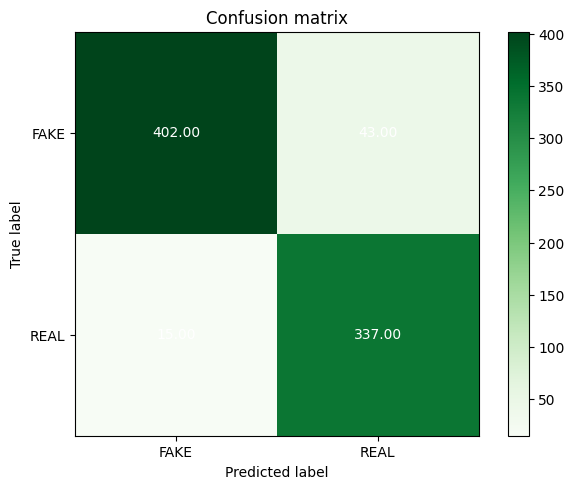

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)


print("Accuracy:", accuracy)
print("Precision:",precision_lr)
print("Recall:",recall_lr)
print("F1 Score:", f1_lr)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'], cmap=plt.cm.Greens)

plt.show()


**Model Training 03: Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=100)
DTR = DTR.fit(X_train,y_train)

In [ ]:
X_train_prediction_DTR = DTR.predict(X_train).round()
training_data_accuracy_DTR = accuracy_score(X_train_prediction_DTR, y_train)
print('Accuracy score of the training data : ', training_data_accuracy_DTR)

Accuracy score of the training data :  1.0


In [ ]:
X_test_prediction_DTR = DTR.predict(X_test).round()
test_data_accuracy_DTR = accuracy_score(X_test_prediction_DTR, y_test)
print('Accuracy score of the test data : ', test_data_accuracy_DTR)  #.

Accuracy score of the test data :  0.9360100376411543


Accuracy in Decision Tree Regression:  0.9360100376411543
Precision: 0.9360100376411543
Recall: 0.9360100376411543
F1 Score: 0.9360100376411543


Text(0.5, 1.0, 'Confusion Matrix')

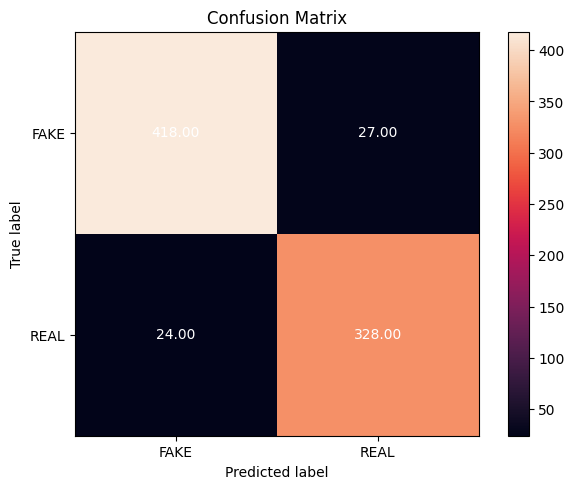

In [ ]:
print("Accuracy in Decision Tree Regression: ", metrics.accuracy_score(y_test, X_test_prediction_DTR))
print("Precision:",metrics.precision_score(y_test, X_test_prediction_DTR, average='micro'))
print("Recall:",metrics.recall_score(y_test, X_test_prediction_DTR, average='micro'))
print("F1 Score:",metrics.f1_score(y_test, X_test_prediction_DTR, average='micro'))
cf_matrix = confusion_matrix(y_test,X_test_prediction_DTR)
#sns.heatmap(cf_matrix, annot = True, fmt=".2g", cmap="rocket")
plot_confusion_matrix(cf_matrix, classes=['FAKE', 'REAL'], cmap='rocket')
plt.title('Confusion Matrix')

**Model Training 04: Decision Tree Classifier**


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X_train_prediction_DTC = DTC.predict(X_train)
training_data_accuracy_DTC = accuracy_score(X_train_prediction_DTC, y_train)
print('Accuracy score of the training data : ', training_data_accuracy_DTC)

Accuracy score of the training data :  1.0


In [ ]:
X_test_prediction_DTC = DTC.predict(X_test)
test_data_accuracy_DTC = accuracy_score(X_test_prediction_DTC, y_test)
print('Accuracy score of the test data : ', test_data_accuracy_DTC)

Accuracy score of the test data :  0.9322459222082811


Accuracy in Decision Tree Classifier:  0.9322459222082811
Precision: 0.9322459222082811
Recall: 0.9322459222082811
F1 Score: 0.9322459222082811


Text(0.5, 1.0, 'Confusion Matrix')

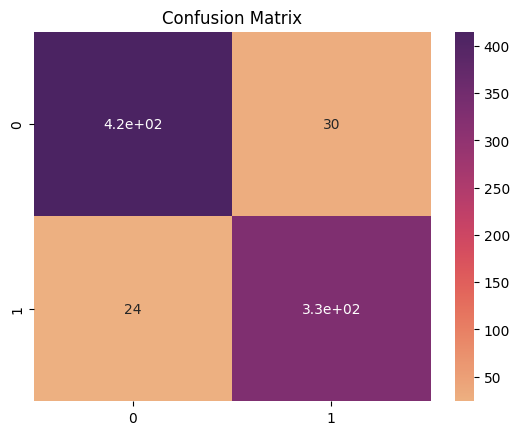

In [ ]:
print("Accuracy in Decision Tree Classifier: ", metrics.accuracy_score(y_test, X_test_prediction_DTC))
print("Precision:",metrics.precision_score(y_test, X_test_prediction_DTC, average='micro'))
print("Recall:",metrics.recall_score(y_test, X_test_prediction_DTC, average='micro'))
print("F1 Score:",metrics.f1_score(y_test, X_test_prediction_DTC, average='micro'))

cf_matrix = confusion_matrix(y_test,X_test_prediction_DTC)
sns.heatmap(cf_matrix, annot = True, fmt=".2g", cmap="flare")
plt.title('Confusion Matrix')

**Prediction**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lra = round(metrics.accuracy_score(y_test, X_test_prediction_lr)*100,2)
nba = round(metrics.accuracy_score(y_test, X_test_prediction_nb)*100,2)
dtra = round(metrics.accuracy_score(y_test, X_test_prediction_DTR)*100,2)
dtc = round(metrics.accuracy_score(y_test, X_test_prediction_DTC)*100,2)
data = {'Logistic Regression':lra, 'Naive Bayes':nba, 'Decision Tree Regression':dtra,'Decision Tree Classifier':dtc}
models = list(data.keys())
accuracy = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(models, accuracy, color ='orange', width = 0.4)

plt.xlabel("Model name")
plt.ylabel("Accuray")
plt.title("Accuracy of the Models")
plt.show()
print(lra,nba,dtra,dtc)

In [ ]:
def labeling(lb):
	if lb == 0:
		return 'This is a Fake News'
	elif lb == 1:
		return 'This is a Real News'

def predicting(testing):
	textv = {'The news':[testing]}
	dftest = pd.DataFrame(textv)
	dftest['The news'] = dftest['The news'].apply(wordPreprocessing)
	vect = vectorizer.transform(dftest['The news'])
	pred_LR = LR.predict(vect)
	pred_NB = nb_classifier.predict(vect)
	pred_DTR = DTR.predict(vect)
	pred_DTC = DTC.predict(vect)

	return print("\n\nLogistic Regression Prediction: {} \nNaive Bayes Prediction: {} \nDecision Tree Regression Prediction: {} \nDecision Tree Classifier Prediction: {}".format(labeling(pred_LR[0]), labeling(pred_NB[0]), labeling(pred_DTR[0]), labeling(pred_DTC[0])))


testing = str(input("Write something: "))
predicting(testing)
